Import Libraries


In [19]:
import sys
import os
sys.path.append(os.path.abspath("../src"))  # ajoute le dossier src au path

from project_utils import ProjectDataset
from model import OCRModel
import torch
from project_utils import ProjectDataset
from model import OCRModel
import matplotlib.pyplot as plt

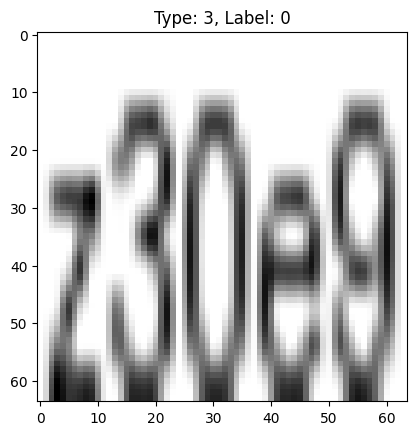

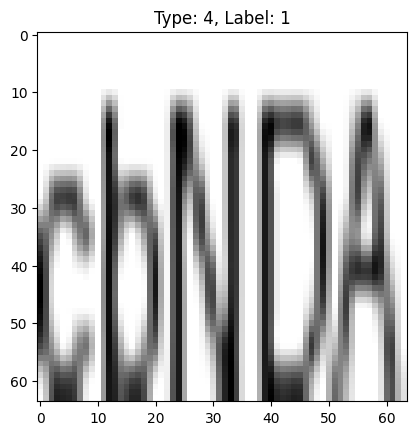

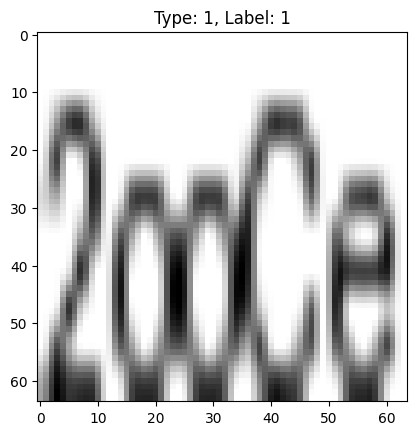

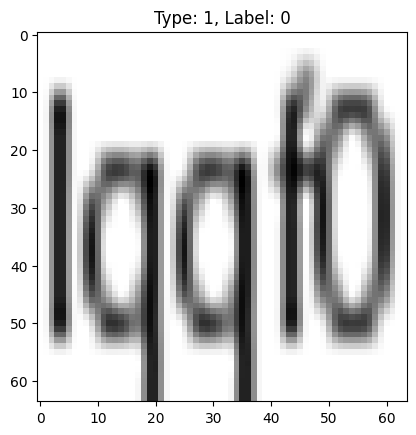

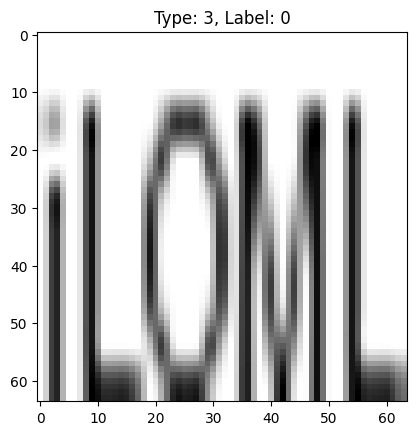

In [20]:
dataset = ProjectDataset(num_samples=50)
for i in range(5):
    (img, type_vec), label = dataset[i]
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Type: {type_vec.argmax().item()}, Label: {label}")
    plt.show()


In [21]:
model = OCRModel()
model.load_state_dict(torch.load("../saved_models/ocr_model.pth"))
model.eval()

OCRModel(
  (image_layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=4101, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
)

In [22]:
(img, type_vec), label = dataset[0]
img = img.unsqueeze(0)       # ajouter batch dimension
type_vec = type_vec.unsqueeze(0)

with torch.no_grad():
    output = model(img, type_vec)
    pred = torch.argmax(output, dim=1).item()

print(f"Label réel : {label}, Label prédit : {pred}")

Label réel : 0, Label prédit : 0


In [23]:
print("\nPrédictions sur 5 échantillons :")
for i in range(5):
    (img, type_vec), label = dataset[i]
    img = img.unsqueeze(0)
    type_vec = type_vec.unsqueeze(0)
    with torch.no_grad():
        output = model(img, type_vec)
        pred = torch.argmax(output, dim=1).item()
    print(f"Sample {i+1} → Label réel: {label}, Label prédit: {pred}")


Prédictions sur 5 échantillons :
Sample 1 → Label réel: 0, Label prédit: 0
Sample 2 → Label réel: 1, Label prédit: 1
Sample 3 → Label réel: 1, Label prédit: 0
Sample 4 → Label réel: 0, Label prédit: 1
Sample 5 → Label réel: 0, Label prédit: 1
